# LIBRARIES


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import pickle

# INISIASI DATASET


In [2]:
# import
SENTIMENT_DATASET_FILE_NAME = "ind-sentiment.csv"
SENTIMENT_DATASET_FILE_PATH = f"outputs/{SENTIMENT_DATASET_FILE_NAME}"
DATA_FRAME_SENTIMENT_DATASET = pd.read_csv(SENTIMENT_DATASET_FILE_PATH)
DATA_FRAME_SENTIMENT_DATASET_LENGTH = len(DATA_FRAME_SENTIMENT_DATASET)
print(f"sentiment dataset: {DATA_FRAME_SENTIMENT_DATASET_LENGTH} tweets")
display(DATA_FRAME_SENTIMENT_DATASET.tail(1))

sentiment dataset: 4042 tweets


,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,after_stopwords_text,after_stemming_text,ind_preprocessed_text,inset_compound_score,inset_label,sentistrength_compound_score,sentistrength_label
4041,1685924328851038208,maulani_salsa76,Maulani Salsa,1822028454411563237,@aminun40 Dukung pemindahan Ibu Kota Nusantara...,Fri Aug 09 21:53:29 +0000 2024,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan kota nusantara mengoptimalka...,dukung pindah kota nusantara optimal guna sumb...,dukung pindah kota nusantara optimal guna sumb...,0.1095,positif,0.875,positif


# TF-IDF


In [3]:
sentiment = DATA_FRAME_SENTIMENT_DATASET

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(sentiment["ind_preprocessed_text"])

feature_names = vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
df_tfidf

,aaa,aaamiin,abad,abadi,abah,abang,abdul,abdullah,about,acak,...,zero,zifus,zii,zimbabwe,zize,zombienya,zona,zonasi,zoom,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# DATA SPLIT (80% TRAIN, 20% TEST)


In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(df_tfidf.values,sentiment["inset_label"],test_size=0.2,random_state=21)

# KNN InSet


| k = 1 |
| accuracy: 0.8380716934487021 |
| precision: 0.8371677263366389 |
| recall: 0.8380716934487021 |
| f1: 0.8372104910049023 |


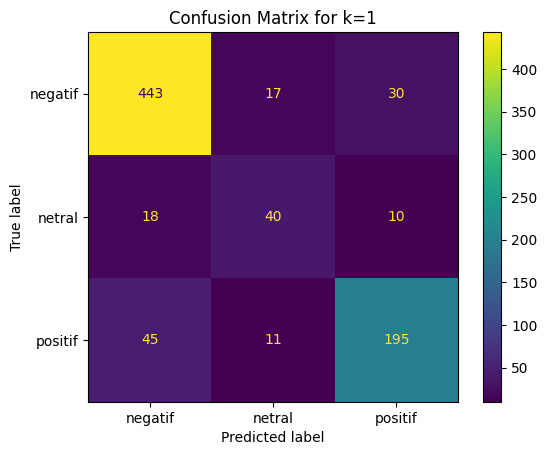

| k = 3 |
| accuracy: 0.8244746600741656 |
| precision: 0.8197556471102905 |
| recall: 0.8244746600741656 |
| f1: 0.8194335616617702 |


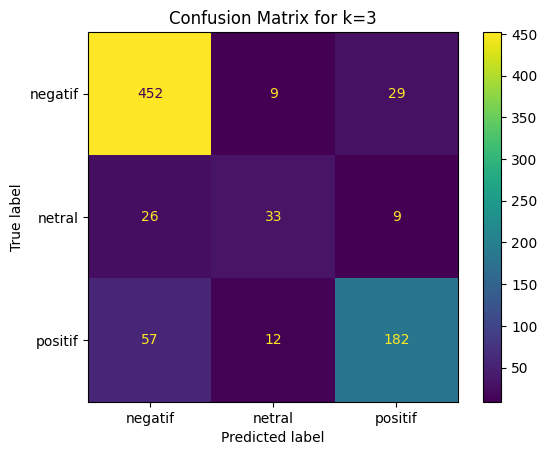

| k = 5 |
| accuracy: 0.8084054388133498 |
| precision: 0.7997906715723629 |
| recall: 0.8084054388133498 |
| f1: 0.8000977483430324 |


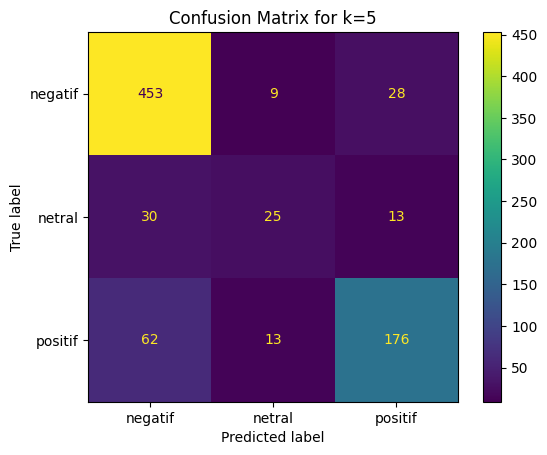

| k = 7 |
| accuracy: 0.7762669962917181 |
| precision: 0.7651869919710814 |
| recall: 0.7762669962917181 |
| f1: 0.7648169202431375 |


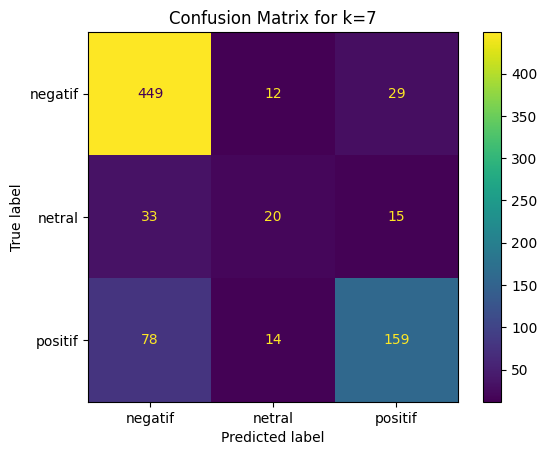

| k = 9 |
| accuracy: 0.7750309023485785 |
| precision: 0.7626589697418392 |
| recall: 0.7750309023485785 |
| f1: 0.7600280797629441 |


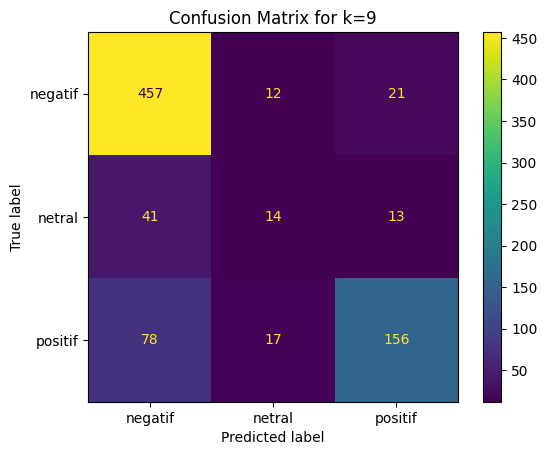

In [5]:
def train_evaluate_knn(k, X_train, Y_train, X_test, Y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print(f"| k = {k} |")
    print(f"| accuracy: {accuracy} |")
    print(f"| precision: {precision} |")
    print(f"| recall: {recall} |")
    print(f"| f1: {f1} |")
    
    cm = confusion_matrix(Y_test, y_pred, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix for k={k}")
    plt.show()
    
    return knn


knn1 = train_evaluate_knn(1, X_train, Y_train, X_test, Y_test)
knn3 = train_evaluate_knn(3, X_train, Y_train, X_test, Y_test)
knn5 = train_evaluate_knn(5, X_train, Y_train, X_test, Y_test)
knn7 = train_evaluate_knn(7, X_train, Y_train, X_test, Y_test)
knn9 = train_evaluate_knn(9, X_train, Y_train, X_test, Y_test)

# DUMP KNN MODEL AND TF-IDF VECTORIZER


In [6]:
def save_model(model, filename):
    with open(filename, 'wb') as model_file:
            pickle.dump(model, model_file)

save_model(knn1, 'models/ind_inset_knn1_model.pkl')
save_model(knn3, 'models/ind_inset_knn3_model.pkl')
save_model(knn5, 'models/ind_inset_knn5_model.pkl')
save_model(knn7, 'models/ind_inset_knn7_model.pkl')
save_model(knn9, 'models/ind_inset_knn9_model.pkl')
save_model(vectorizer, 'models/ind_vectorizer_model.pkl')